In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


In [75]:
df=pd.DataFrame(data=diabetes_X[0:,0:],
...              index=[i for i in range(diabetes_X.shape[0])],
...              columns=['feat-'+str(i+1) for i in range(diabetes_X.shape[1])])

In [76]:
print(df.shape)
df.head()


(442, 10)


,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8,feat-9,feat-10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [77]:
# Use only one feature (the nineth)
# np.newaxis = A convenient alias for None
diabetes_X_single = diabetes_X[:, np.newaxis, 7]
print(diabetes_X_single.shape)
diabetes_X_single[0:5+1]

(442, 1)


array([[-0.00259226],
       [-0.03949338],
       [-0.00259226],
       [ 0.03430886],
       [-0.00259226],
       [-0.0763945 ]])

In [78]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_single[:-20]
diabetes_X_test = diabetes_X_single[-20:]
print('X')
print('train ',diabetes_X_train.shape)
print('test ',diabetes_X_test.shape)

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
print('Y')
print('train ',diabetes_y_train.shape)
print('test ',diabetes_y_test.shape)

X
train  (422, 1)
test  (20, 1)
Y
train  (422,)
test  (20,)


In [79]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [80]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
print(diabetes_y_pred.shape)

(20,)


In [82]:

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [701.12961061]
Mean squared error: 4850.82
Coefficient of determination: -0.00


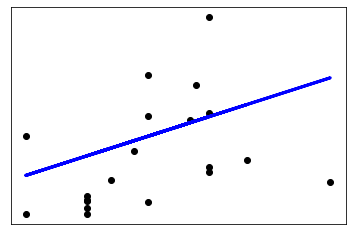

In [83]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()